In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'temperatures' is your dictionary
temperatures = {319.0: 0.63985, 319.1: 0.9045, 319.11: 0.97995, 319.2: 0.7469, 323.2: 0.7565, 323.3: 0.7565, 324.6: 0.8654999999999999, 334.8: 0.8654999999999999, 344.2: 0.81345, 344.3: 0.962, 344.4: 0.9048, 344.5: 0.8705, 344.74: 0.9316, 344.8: 0.66395, 345.0: 0.67845, 353.15: 0.9212, 354.8: 0.8654999999999999, 363.15: 0.91665, 372.94: 0.89175, 373.15: 0.87765, 373.2: 0.6835}
data = []

for temperature in temperatures.keys():
    found_data = False
    filename = f"julia_out/out_{temperature}.txt"
    
    # Check if file exists
    if not os.path.isfile(filename):
        print(f"File {filename} not found.")
        continue

    with open(filename, 'r') as file:
        lines = file.readlines()[35:]  # Skip first 35 lines

    for line in lines:
        elements = line.split('\t')  # Split line into elements by tabs
        if len(elements) >= 17:  # Check if there are at least 17 elements
            element_8 = elements[7]  # Get 8th element (0-indexed)
            element_10 = float(elements[9])/1000 # pressure
            element_12 = elements[11]  # gas_fraction
            element_17 = elements[16]  # liquid_fraction
            
            if element_8 != 'NaN':
                found_data = True
            if element_8 == 'NaN' and found_data:
                break           

            if element_8 != 'NaN':
                data.append([temperature, float(element_10), float(element_12), float(element_17)])

new_df = pd.DataFrame(data, columns=['temperature', 'pressure', 'gas_fraction', 'liquid_fraction'])
                
            # Do something with the elements
            # print(element_8, element_12, element_17)

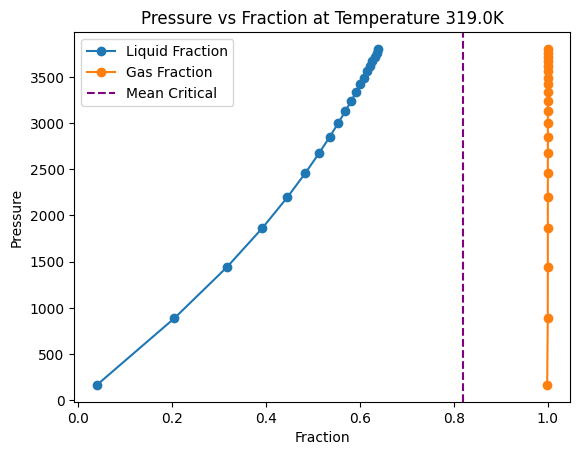

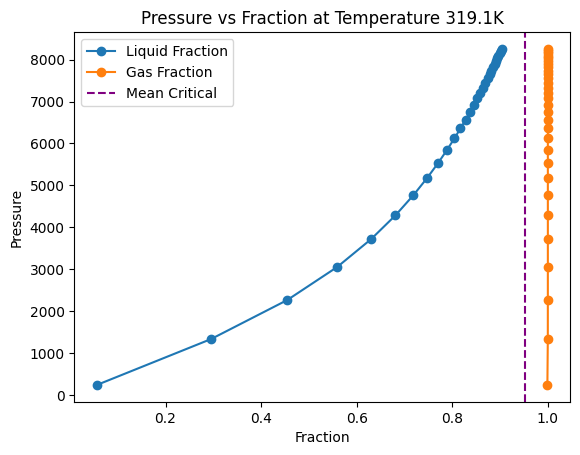

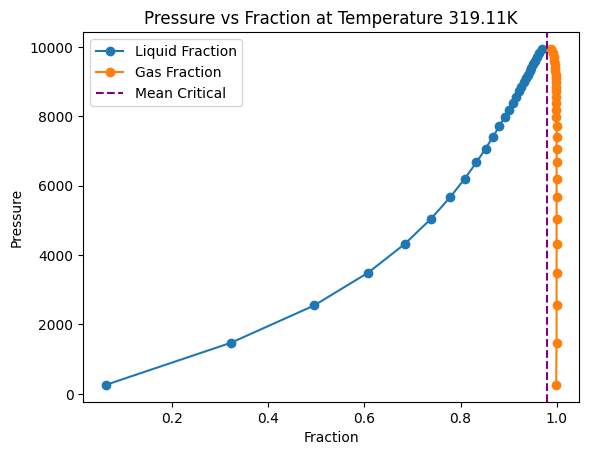

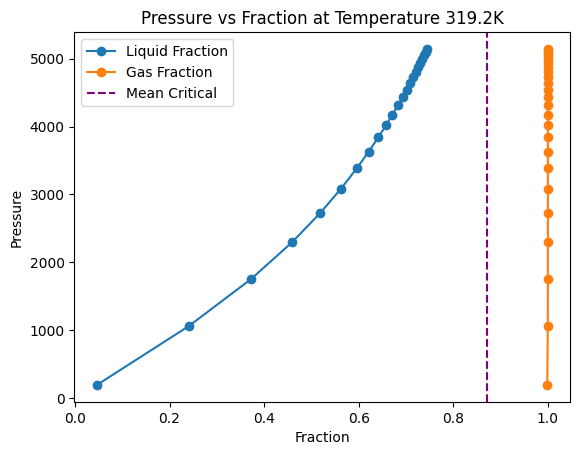

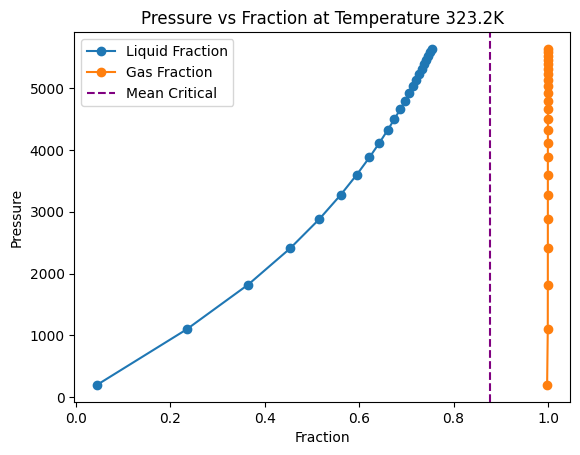

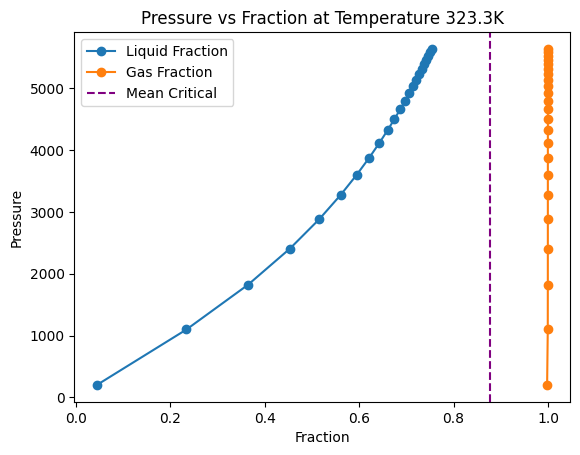

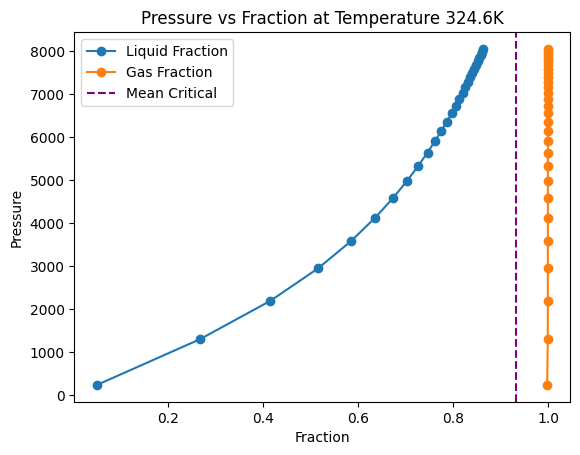

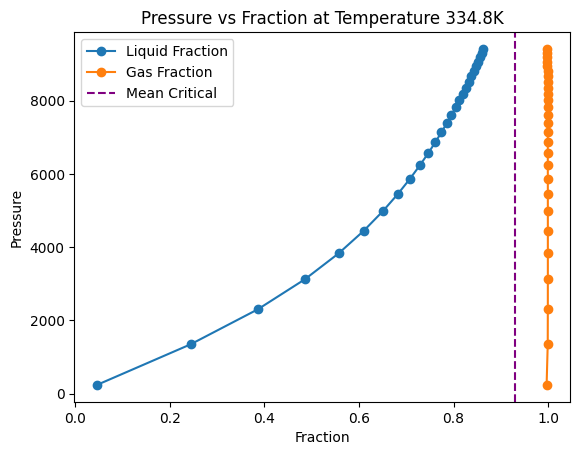

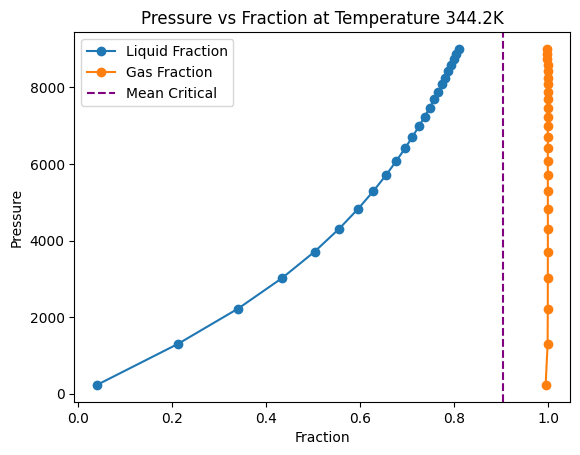

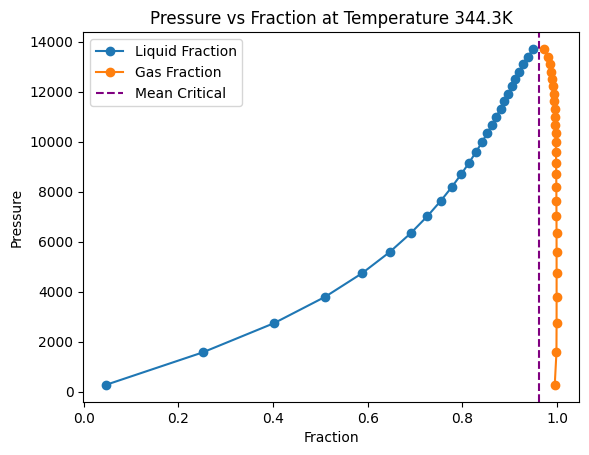

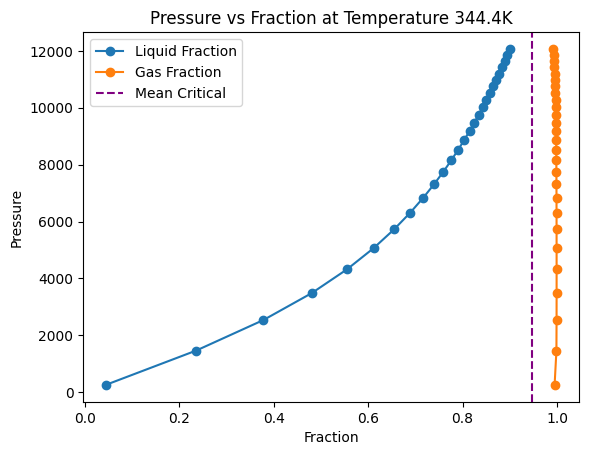

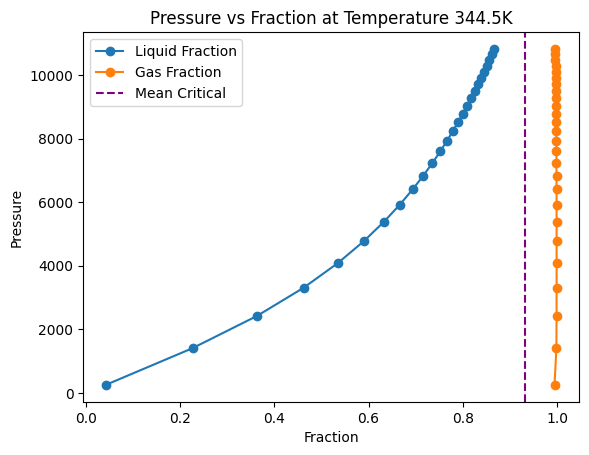

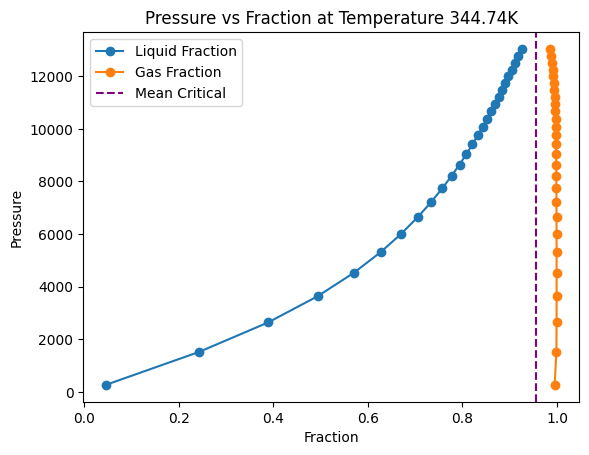

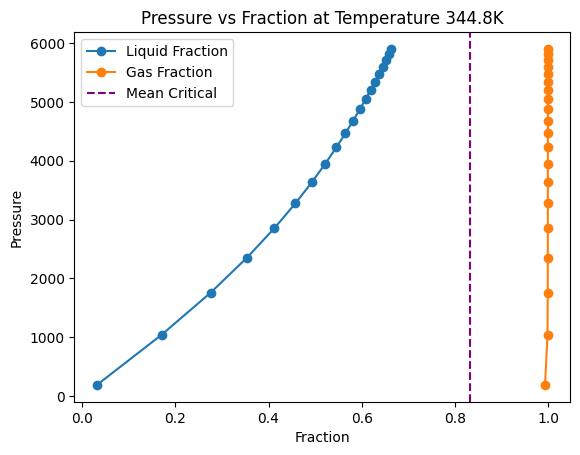

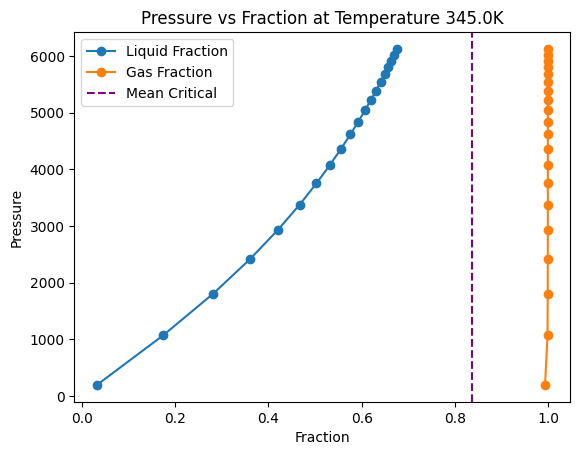

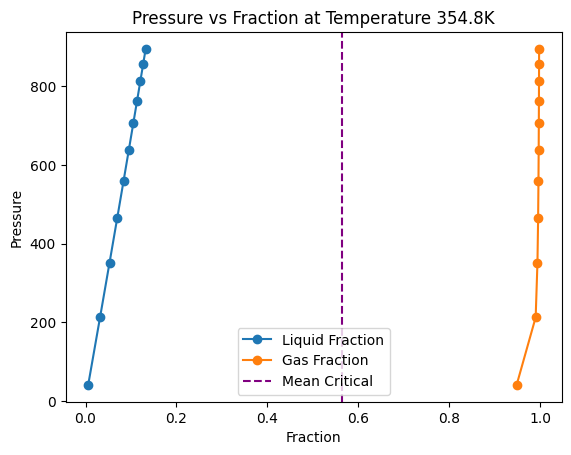

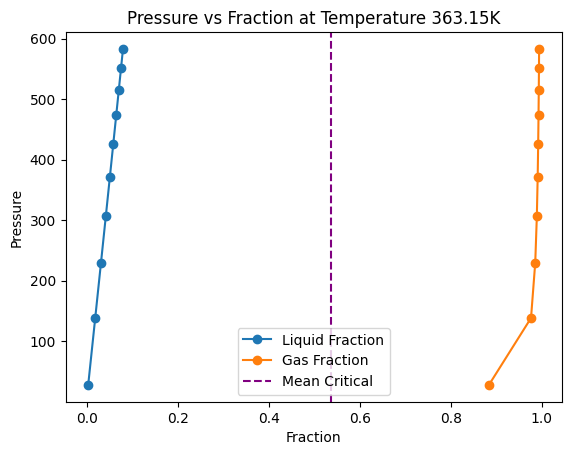

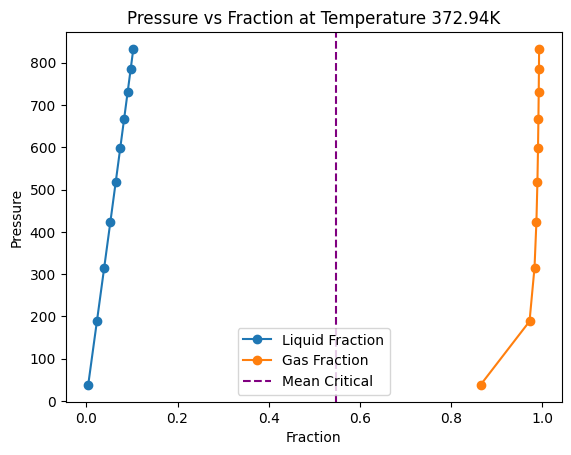

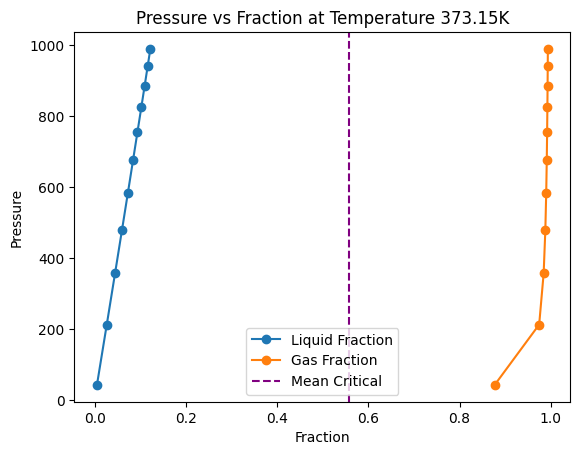

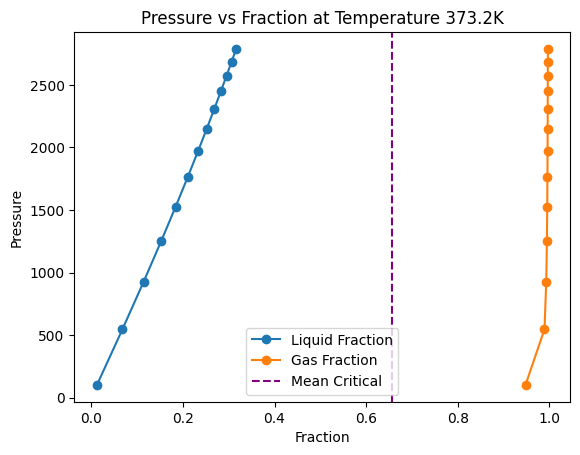

0.9699900153240012 0.9725517679523096


In [6]:
# Get unique temperatures
temperatures = new_df['temperature'].unique()
temperatures = sorted([temp for temp in temperatures if not np.isnan(temp)])
absml = 0.0
absmg = 1.0
mean_criticals = dict()

for temp in temperatures:
    # Filter data for the current temperature
    temp_df = new_df[new_df['temperature'] == temp].sort_values('pressure')

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Check if 'liquid_fraction' column exists and is not all NaN
    max_liquid = 0.0
    min_gas = 1.0
    if 'liquid_fraction' in temp_df.columns and not temp_df['liquid_fraction'].isna().all():
        # max_liquid = temp_df['liquid_fraction'].iloc[-1]
        max_liquid = temp_df['liquid_fraction'].loc[temp_df['liquid_fraction'].last_valid_index()]
        ax.plot(temp_df['liquid_fraction'], temp_df['pressure'], '-o', label='Liquid Fraction')

    # Check if 'gas_fraction' column exists and is not all NaN
    if 'gas_fraction' in temp_df.columns and not temp_df['gas_fraction'].isna().all():
        # min_gas = temp_df['gas_fraction'].iloc[-1]
        min_gas = temp_df['gas_fraction'].loc[temp_df['gas_fraction'].last_valid_index()]
        ax.plot(temp_df['gas_fraction'], temp_df['pressure'], '-o', label='Gas Fraction')

    absml = max(max_liquid, absml)
    absmg = min(min_gas, absmg)
    mean_critical = (max_liquid + min_gas)/2
    ax.axvline(x=mean_critical, color='purple', linestyle='--', label='Mean Critical')
    mean_criticals[temp] = mean_critical

    # Set labels and title
    ax.set_xlabel('Fraction')
    ax.set_ylabel('Pressure')
    ax.set_title(f'Pressure vs Fraction at Temperature {temp}K')

    # Show legend
    ax.legend()

    # Show the plot
    plt.show()

print(absml, absmg)
